### covid data set


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
covid_data=pd.read_csv("/home/pavankumar/data_sci_dec/datasets/covid19_usa.csv")

In [3]:
df=covid_data

In [4]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [6]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

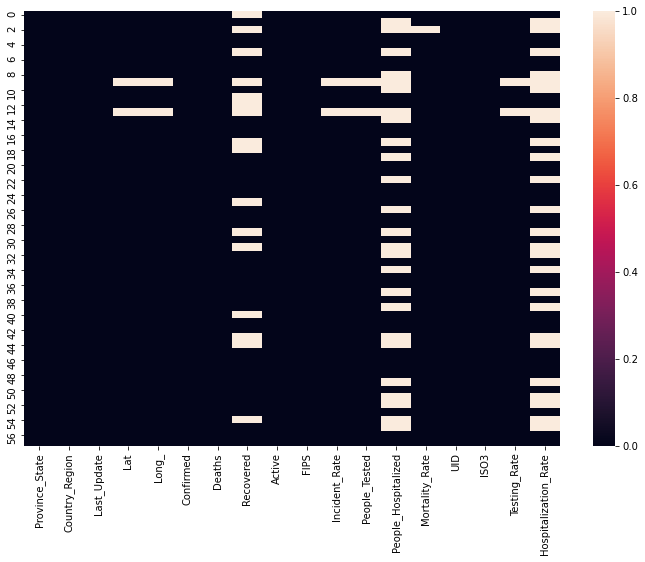

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [8]:
one_factor=[]
more_factor=[]

for i in df.columns:
    print("Column name is  ", i)
    print(df[i].value_counts())
    print("Total No. of factors in " , i ,"==> ",len(df[i].value_counts()))
    print("-----------*******************************-------------")
    
    if len(df[i].value_counts()) == 1 :
        one_factor.append(i)
    if len(df[i].value_counts()) >= 1:
        more_factor.append(i)

Column name is   Province_State
Delaware                    1
Kansas                      1
New York                    1
Maryland                    1
Northern Mariana Islands    1
Tennessee                   1
Connecticut                 1
District of Columbia        1
South Carolina              1
New Jersey                  1
Vermont                     1
Guam                        1
Diamond Princess            1
Alabama                     1
Florida                     1
Indiana                     1
Illinois                    1
Utah                        1
Colorado                    1
Idaho                       1
Oregon                      1
West Virginia               1
Georgia                     1
Maine                       1
Ohio                        1
North Carolina              1
Louisiana                   1
Kentucky                    1
Rhode Island                1
Mississippi                 1
Missouri                    1
New Hampshire               1
North Da

In [9]:
# only_one_categories=[]
# categorical=[]
# for i in df.columns:
#    print("Column name is ",i)
#    print(df[i].value_counts(),'\n')
#    print(f'\n Total Number of Categoricals in {i} ==> {len(df[i].value_counts())}\n')
#    print("==============================")
#    if len(df[i].value_counts()) == 1:
#        only_one_categories.append(i)
#    if len(df[i].value_counts()) < 100 and i not in only_one_categories:
#        categorical.append(i)

In [10]:
one_factor

['Country_Region', 'Last_Update']

In [11]:
df['ISO3']

0     USA
1     USA
2     ASM
3     USA
4     USA
5     USA
6     USA
7     USA
8     USA
9     USA
10    USA
11    USA
12    USA
13    USA
14    GUM
15    USA
16    USA
17    USA
18    USA
19    USA
20    USA
21    USA
22    USA
23    USA
24    USA
25    USA
26    USA
27    USA
28    USA
29    USA
30    USA
31    USA
32    USA
33    USA
34    USA
35    USA
36    USA
37    USA
38    USA
39    MNP
40    USA
41    USA
42    USA
43    USA
44    PRI
45    USA
46    USA
47    USA
48    USA
49    USA
50    USA
51    USA
52    VIR
53    USA
54    USA
55    USA
56    USA
57    USA
Name: ISO3, dtype: object

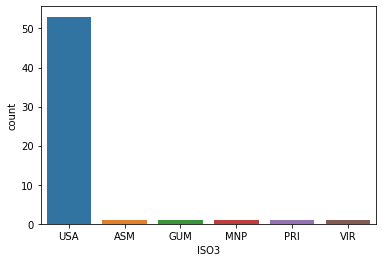

In [12]:
sns.countplot(df['ISO3'])

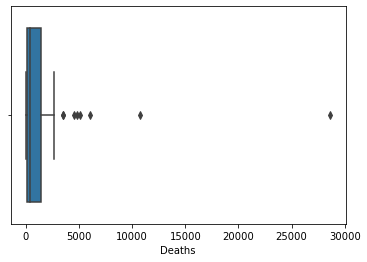

In [13]:
sns.boxplot(df['Deaths'])

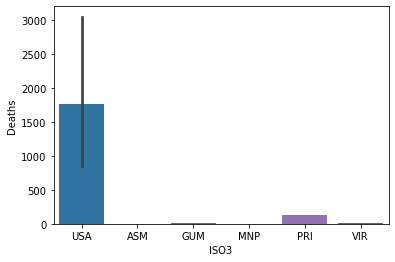

In [14]:
sns.barplot(x=df['ISO3'],y=df['Deaths'])

### Lable Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['ISO3']=le.fit_transform(df['ISO3'])
df['Province_State']=le.fit_transform(df['Province_State'])
df['ISO3'].value_counts()

4    53
5     1
3     1
2     1
1     1
0     1
Name: ISO3, dtype: int64

In [16]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,4,3353.942386,11.438860
1,1,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,4,5063.940017,NaN
2,2,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,0,222.857246,NaN
3,3,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,4,2272.859351,12.022005
4,4,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,4,3189.670370,10.693584


###### Droping Country region and Last Update 

In [17]:
df.drop(['Country_Region', 'Last_Update'],axis=1,inplace=True) ## Both columns have no Uniqeness

In [18]:
df.shape

(58, 16)

In [19]:
df.corr()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,0.157083,0.091266,0.006490,0.015229,0.081279,-0.027612,-0.195045,-0.079874,-0.066761,0.007398,0.019524,-0.031331,0.196777,0.084877,-0.178396
Lat,0.157083,1.000000,-0.278274,0.120959,0.120024,0.043318,0.120148,-0.374943,0.245693,0.084769,0.065030,-0.189675,0.774106,0.725014,0.309579,-0.162856
Long_,0.091266,-0.278274,1.000000,0.009998,0.028772,-0.043379,0.011654,0.367911,0.041318,-0.077781,0.280909,0.318569,-0.526908,-0.403983,0.190191,0.251661
Confirmed,0.006490,0.120959,0.009998,1.000000,0.982191,0.876856,0.985218,-0.096696,0.711776,0.828022,0.989936,0.383425,0.153972,0.109999,0.334032,0.327376
Deaths,0.015229,0.120024,0.028772,0.982191,1.000000,0.856295,0.954378,-0.075053,0.712117,0.741730,0.992313,0.427721,0.120043,0.085588,0.345441,0.325817
Recovered,0.081279,0.043318,-0.043379,0.876856,0.856295,1.000000,0.809437,-0.013571,0.592014,0.950785,0.962082,0.362330,0.166898,0.100373,0.252155,0.302197
Active,-0.027612,0.120148,0.011654,0.985218,0.954378,0.809437,1.000000,-0.092276,0.703931,0.829687,0.976456,0.368403,0.146354,0.104824,0.322773,0.332398
FIPS,-0.195045,-0.374943,0.367911,-0.096696,-0.075053,-0.013571,-0.092276,1.000000,-0.220264,-0.194011,0.013433,-0.262258,0.058022,0.040586,-0.092705,-0.172665
Incident_Rate,-0.079874,0.245693,0.041318,0.711776,0.712117,0.592014,0.703931,-0.220264,1.000000,0.441669,0.725370,0.373338,0.264768,0.195580,0.620621,0.258029
People_Tested,-0.066761,0.084769,-0.077781,0.828022,0.741730,0.950785,0.829687,-0.194011,0.441669,1.000000,0.906210,0.231301,0.236043,0.166707,0.230753,0.356618


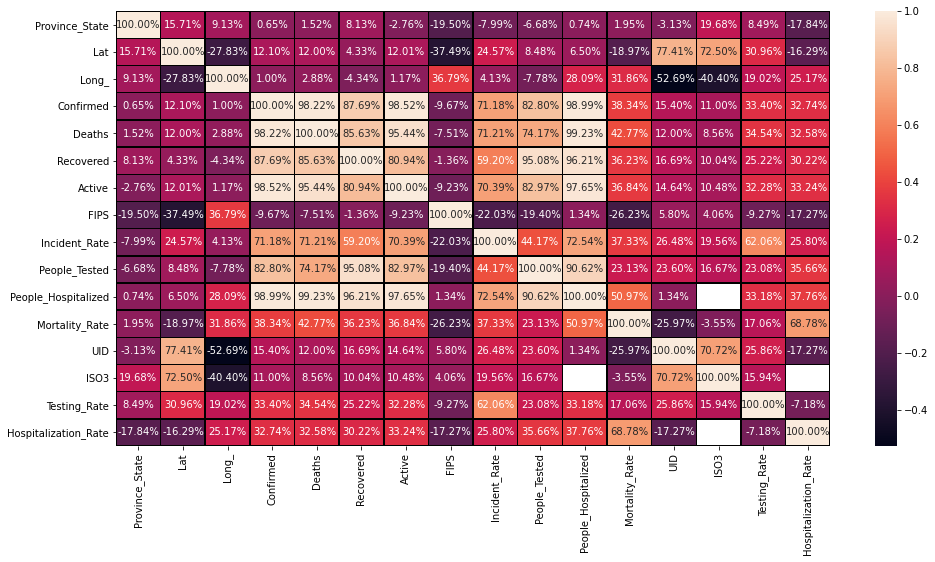

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.5,fmt='.2%')

In [21]:
# Most of columns are heighly correalating with Target Column "Deaths"

In [22]:
df.isnull().sum()

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

### Imputing Null values using KNN

In [23]:
from sklearn.impute import KNNImputer
ki=KNNImputer(n_neighbors=3,weights="uniform")
ra=ki.fit_transform(df)
df1=pd.DataFrame(ra,columns=df.columns)


In [24]:
df1.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0.0,32.3182,-86.9023,13052.0,522.0,7909.333333,12530.0,1.0,266.194321,164450.0,1493.000000,3.999387,84000001.0,4.0,3353.942386,11.438860
1,1.0,61.3707,-152.4044,401.0,10.0,352.000000,39.0,2.0,54.815493,37045.0,170.333333,2.493766,84000002.0,4.0,5063.940017,11.625674
2,2.0,-14.2710,-170.1320,0.0,0.0,66.333333,0.0,60.0,0.000000,124.0,176.000000,5.434628,16.0,0.0,222.857246,11.343805
3,3.0,33.7298,-111.4312,14906.0,747.0,3773.000000,10386.0,4.0,204.788838,165435.0,1792.000000,5.011405,84000004.0,4.0,2272.859351,12.022005
4,4.0,34.9697,-92.3731,5003.0,107.0,3852.000000,1044.0,5.0,165.782801,96258.0,535.000000,2.138717,84000005.0,4.0,3189.670370,10.693584


In [25]:
df1.isnull().sum()

Province_State          0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [26]:
# No Null values are present

### Checking skewness and Outliers

In [27]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [28]:
df1.skew()

Province_State          0.000000
Lat                    -2.271723
Long_                   3.571584
Confirmed               4.708614
Deaths                  5.489201
Recovered               2.161166
Active                  4.180953
FIPS                    5.269070
Incident_Rate           2.003213
People_Tested           2.831940
People_Hospitalized     5.755475
Mortality_Rate          0.470499
UID                    -3.027480
ISO3                   -4.126625
Testing_Rate            1.311733
Hospitalization_Rate    1.015909
dtype: float64

In [29]:
df1.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0.0,32.3182,-86.9023,13052.0,522.0,7909.333333,12530.0,1.0,266.194321,164450.0,1493.000000,3.999387,84000001.0,4.0,3353.942386,11.438860
1,1.0,61.3707,-152.4044,401.0,10.0,352.000000,39.0,2.0,54.815493,37045.0,170.333333,2.493766,84000002.0,4.0,5063.940017,11.625674
2,2.0,-14.2710,-170.1320,0.0,0.0,66.333333,0.0,60.0,0.000000,124.0,176.000000,5.434628,16.0,0.0,222.857246,11.343805
3,3.0,33.7298,-111.4312,14906.0,747.0,3773.000000,10386.0,4.0,204.788838,165435.0,1792.000000,5.011405,84000004.0,4.0,2272.859351,12.022005
4,4.0,34.9697,-92.3731,5003.0,107.0,3852.000000,1044.0,5.0,165.782801,96258.0,535.000000,2.138717,84000005.0,4.0,3189.670370,10.693584


In [30]:
df1.drop(['Deaths','ISO3','Mortality_Rate','Province_State'],axis=1).columns

Index(['Lat', 'Long_', 'Confirmed', 'Recovered', 'Active', 'FIPS',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'UID',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

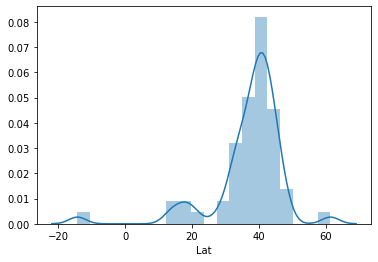

Column Name is : Lat 
==================Before removing Skewness is -2.27172297575747



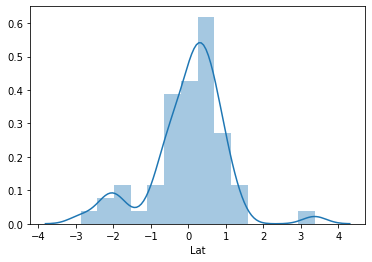

Column Name is : Lat 
==================After removing Skewness is -0.3833636100063999



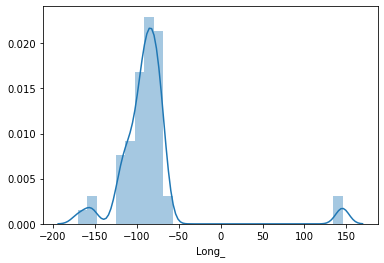

Column Name is : Long_ 
==================Before removing Skewness is 3.5715839821083577



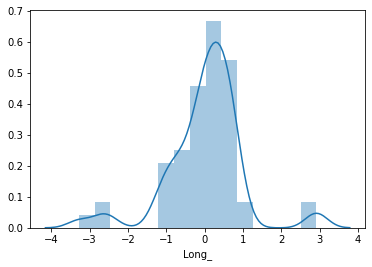

Column Name is : Long_ 
==================After removing Skewness is -0.4294437196906524



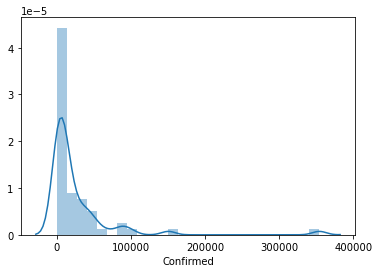

Column Name is : Confirmed 
==================Before removing Skewness is 4.70861433293441



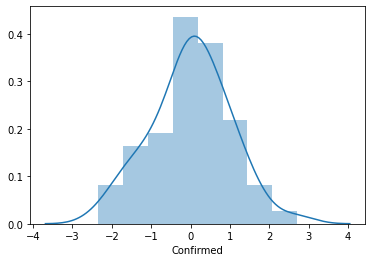

Column Name is : Confirmed 
==================After removing Skewness is -0.033709212061108246



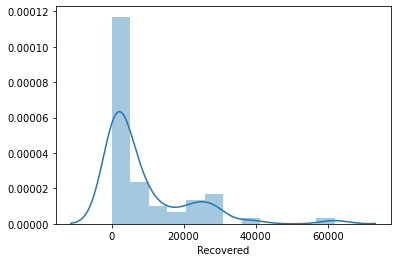

Column Name is : Recovered 
==================Before removing Skewness is 2.1611660678319566



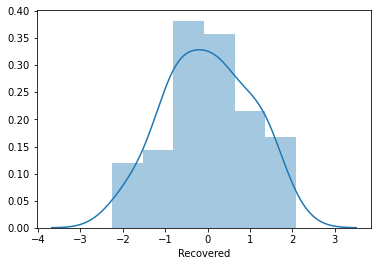

Column Name is : Recovered 
==================After removing Skewness is -0.06258299650522951



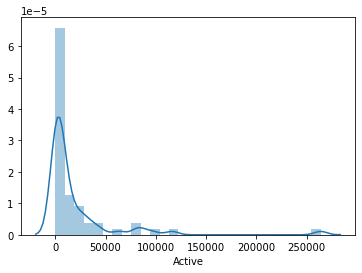

Column Name is : Active 
==================Before removing Skewness is 4.180952955790349



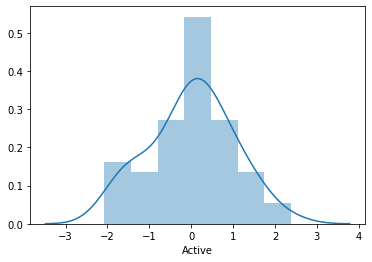

Column Name is : Active 
==================After removing Skewness is -0.08988597317472015



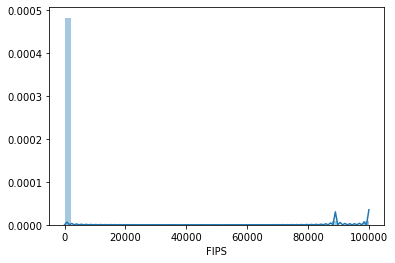

Column Name is : FIPS 
==================Before removing Skewness is 5.269070083201112



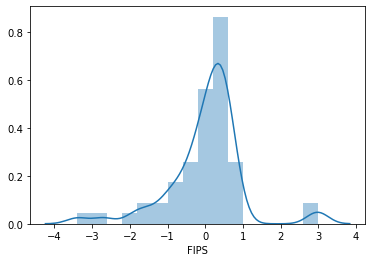

Column Name is : FIPS 
==================After removing Skewness is -0.3894592452220777



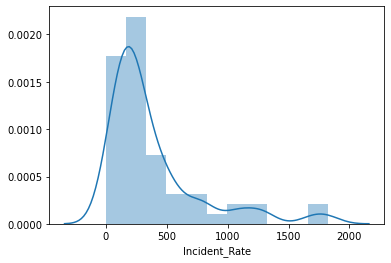

Column Name is : Incident_Rate 
==================Before removing Skewness is 2.0032130926019733



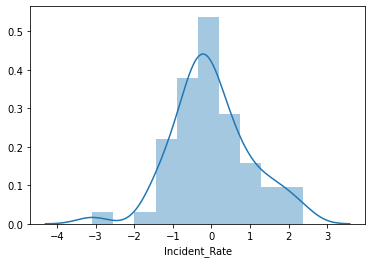

Column Name is : Incident_Rate 
==================After removing Skewness is 0.09147573518726529



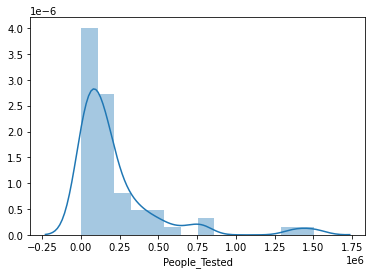

Column Name is : People_Tested 
==================Before removing Skewness is 2.8319401335654244



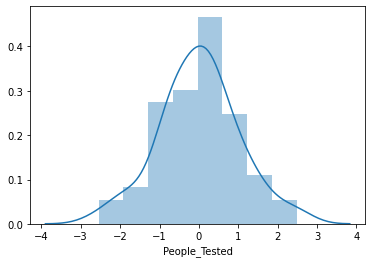

Column Name is : People_Tested 
==================After removing Skewness is 0.02251399808036006



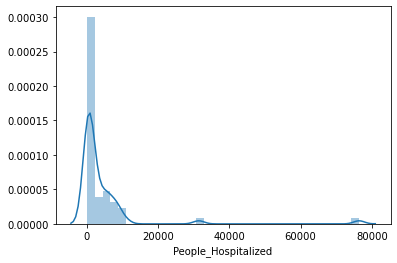

Column Name is : People_Hospitalized 
==================Before removing Skewness is 5.755474803580383



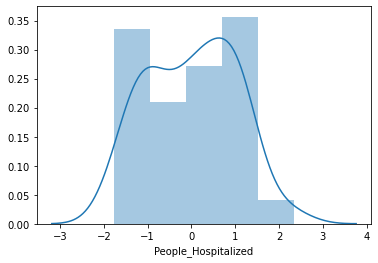

Column Name is : People_Hospitalized 
==================After removing Skewness is 0.02450350968405019



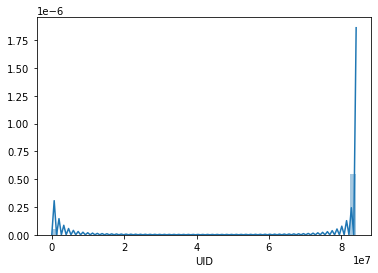

Column Name is : UID 
==================Before removing Skewness is -3.027479962164918



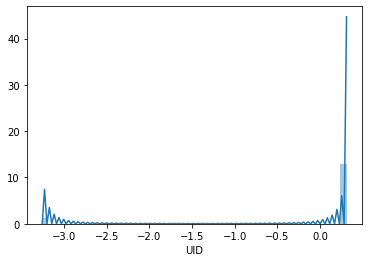

Column Name is : UID 
==================After removing Skewness is -3.027480417025692



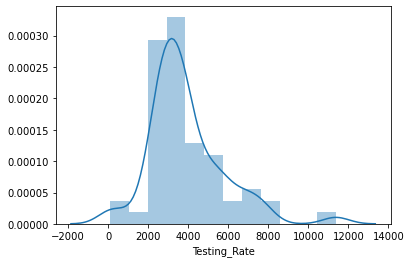

Column Name is : Testing_Rate 
==================Before removing Skewness is 1.311733124449208



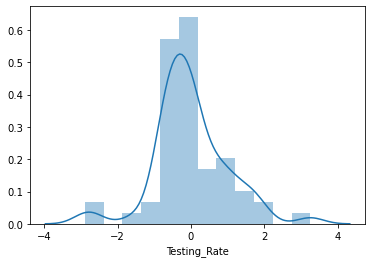

Column Name is : Testing_Rate 
==================After removing Skewness is 0.2246628731665302



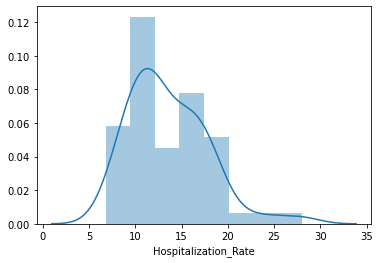

Column Name is : Hospitalization_Rate 
==================Before removing Skewness is 1.0159088607030602



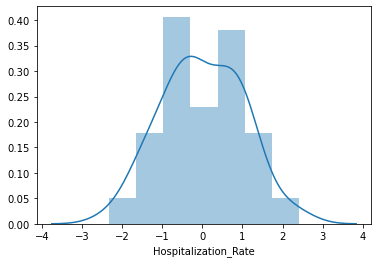

Column Name is : Hospitalization_Rate 
==================After removing Skewness is 0.014085145030239226



In [31]:
for i in df1.drop(['Deaths','ISO3','Mortality_Rate','Province_State'],axis=1).columns:    
    sns.distplot(df1[i])
    plt.show()
    print(f'Column Name is : {i} \n==================Before removing Skewness is {df1[i].skew()}\n')
    df1[i] =pt.fit_transform(pd.DataFrame(df1[i]),0.5)
    sns.distplot(df1[i])
    plt.show()
    print(f'Column Name is : {i} \n==================After removing Skewness is {df1[i].skew()}\n')

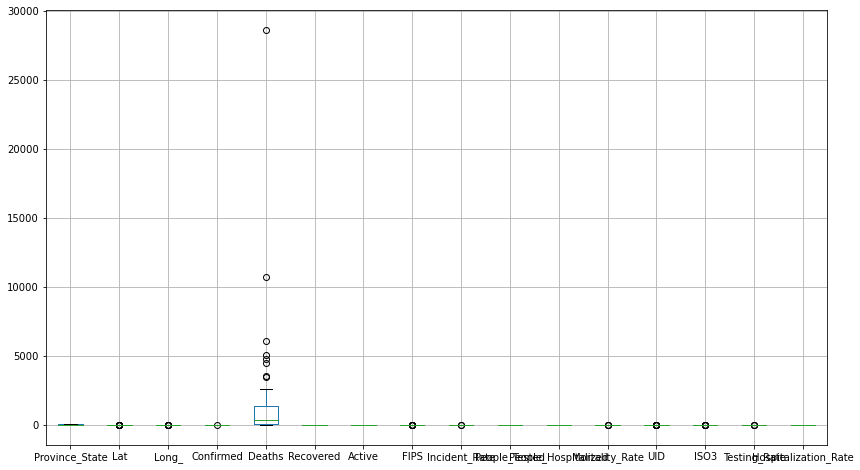

In [32]:
df1.boxplot(figsize=(14,8))

In [33]:
## From above plot shows that Lables columns dont have outliers

###  Applying Standard Scaller on Lable Data

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
ss=StandardScaler()

In [36]:
target=df1['Deaths']

In [37]:
x=df1.drop(['Deaths','ISO3'],axis=1)


In [38]:
x=ss.fit_transform(x)

In [39]:
lable_data=pd.DataFrame(x)

In [40]:
lable_data['ISO3']=df1['ISO3']

### Model Generation

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [42]:
# for best random state
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(lable_data,target, test_size=0.25,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    rscrore=r2_score(y_test,pred)
    crv=cross_val_score(LinearRegression(),X_train,y_train,cv=10).mean()
    if rscrore>accu:
        accu=rscrore
        best_state=i
print(f"Final accuracy is {accu*100} \n Cross Validate score is {(crv*100)} \n# difference is {(accu*100)-(crv*100)} \n best random state is{best_state}")

Final accuracy is 49.274540440055034 
 Cross Validate score is -27908.742672162032 
# difference is 27958.017212602088 
 best random state is133


# Pipeline

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
X_train, X_test, y_train, y_test = train_test_split(lable_data,target, test_size=0.25,random_state=133)

In [45]:
parameters_sgd={
 'penalty': ['l1','l2','elasticnet'],
 'alpha': [0.0001,0.001,0.01,0.1,1],
    'max_iter':[1000,2000],
}
parameters_rndf={
 'criterion': ['mse','mae'],
 'max_features': ['auto','sqrt'],
 'n_estimators': list(np.arange(100,150)),
 'random_state': [133],
    'max_depth':[5],
}
parameters_deci_tree={
 'criterion': ['mse','mae'],
#  'splitter':['best','random'],
 'max_features': ['auto','sqrt'],
 'max_depth':[5],
 'random_state': [133]}
parameters_knn_reg={
    'n_neighbors': list(np.arange(5,10)),
    'weights':['uniform','distance'],
    
}
parameters_svr_reg={
    'kernel': ['linear','poly','rbf'],
#     'gamma':['auto','scale'],
#     'max_iter':[500,700,900,1100,1300,1500,1700],
    'max_iter':[500,700],
    
}
parameters_linear_reg = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [46]:
parameter_lis=[parameters_linear_reg,parameters_knn_reg,parameters_svr_reg,parameters_deci_tree,parameters_sgd]
models=[LinearRegression(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),SGDRegressor()]
models_name=['LinearRegression','KNeighborsRegressor','SVR','DecisionTreeRegressor','SGDRegressor']
lis_pipes=[]    
best_score=0
best_model_name=''
cv_score=0
for n,model,model_name,parameter in zip(np.arange(1,6),models,models_name,parameter_lis):
    lis_pipes.append(Pipeline([(model_name,GridSearchCV(estimator=model,param_grid=parameter,cv=5,scoring='r2'))]))

for model in lis_pipes:
    gsv=model.fit(X_train,y_train)
    pred=gsv[0].best_estimator_.predict(X_test)
    r2score=r2_score(y_test,pred)
    crv=cross_val_score(model,X_train,y_train,cv=2).mean()
    print(f"Final accuracy is {r2score*100} \n\nCross Validate score is {(crv*100)}\n\n{gsv[0].best_estimator_}\n\n{gsv[0].best_params_}\n\n=====================================================")
    if r2score>best_score and crv>0:
        best_score=r2score
        best_model_name=[]
        best_model_name.append(gsv[0])
        
print(f"Best model name is :  {best_model_name[0]}")
    

Final accuracy is 48.14410236446326 

Cross Validate score is -376.8459483331744

LinearRegression(fit_intercept=False, normalize=True)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

Final accuracy is 32.507710344293564 

Cross Validate score is 52.02990370600398

KNeighborsRegressor(weights='distance')

{'n_neighbors': 5, 'weights': 'distance'}

Final accuracy is -4.402461552795933 

Cross Validate score is -15.265242802581136

SVR(kernel='linear', max_iter=500)

{'kernel': 'linear', 'max_iter': 500}

Final accuracy is 57.198243333927714 

Cross Validate score is 52.5537523237789

DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=133)

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'random_state': 133}

Final accuracy is 24.924611618440128 

Cross Validate score is 16.338759430594223

SGDRegressor(alpha=1)

{'alpha': 1, 'max_iter': 1000, 'penalty': 'l2'}

Best model name is :  GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
       

In [47]:
######  criterion{“mse”, “mae”}, default=”mse”
def rndtree(a,b):
    accu=0
    best_n=0
    for i in a:
        mod=RandomForestRegressor(n_estimators=i,random_state=b)
        mod.fit(X_train,y_train)
        pred = mod.predict(X_test)
        accuracy=r2_score(y_test,pred)
        if accuracy>accu:
            accu=accuracy
            best_n=i
    mod=RandomForestRegressor(n_estimators=best_n,random_state=b)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    print(r2_score(y_test,predictions)*100)
    print((cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean()*100))
    print("best n is ", best_n)

In [48]:
rndtree(list(np.arange(120,170)),133)

45.56865381782791
78.35755647210183
best n is  155


In [49]:
def rftree(a,b,c):
    mod=RandomForestRegressor(n_estimators=i,random_state=b,criterion=c)
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    print(r2_score(y_test,pred)*100)
    print((cross_val_score(RandomForestRegressor(n_estimators=i,random_state=b,criterion=c),X_train,y_train,cv=5).mean()*100))

In [50]:
rftree(155,133,'mae')

43.62074625893894
76.49970417324876


In [51]:
rftree(155,133,'mse')

44.70285012288932
76.91223072586088


In [52]:
rfc=RandomForestRegressor(n_estimators=155,random_state=133,criterion='mse')
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=155, random_state=133)

# Conclusion: Best Model is RandomForestRegressor from all above models

In [53]:
import pickle
file_name='covid19_usa.pkl'
pickle.dump(rfc,open(file_name,'wb'))